   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

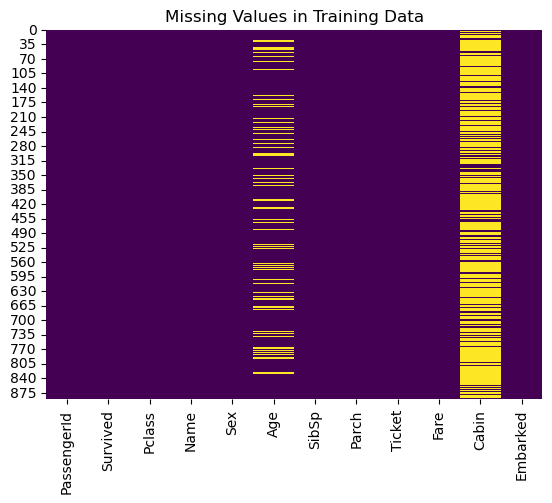

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


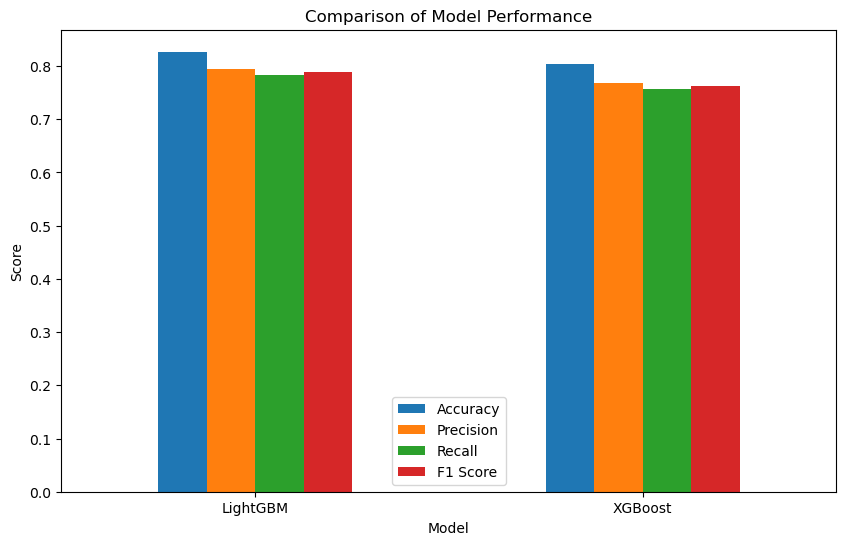

Based on the evaluation metrics, we can conclude which model performs better for the Titanic dataset.


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
import xgboost as xgb

# Load the Data
train_data = pd.read_csv(r"D:\Data since couress\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
test_data = pd.read_csv(r"D:\Data since couress\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

# Display the first few rows of the training data
print(train_data.head())

# Exploratory Data Analysis (EDA)
# Check for missing values
print(train_data.isnull().sum())

# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

# Data Preprocessing
# Fill missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
train_data = train_data.drop(columns=['Cabin', 'Ticket', 'Name'])

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into features and target variable
X = train_data.drop(columns=['Survived', 'PassengerId'])
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Evaluation
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

# Evaluate LightGBM model
print("LightGBM Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("Precision:", precision_score(y_val, y_pred_lgb))
print("Recall:", recall_score(y_val, y_pred_lgb))
print("F1 Score:", f1_score(y_val, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lgb))
print("Classification Report:\n", classification_report(y_val, y_pred_lgb))

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate XGBoost model
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1 Score:", f1_score(y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))

# Comparison of Model Performance
performance_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, y_pred_lgb), accuracy_score(y_val, y_pred_xgb)],
    'Precision': [precision_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_xgb)],
    'Recall': [recall_score(y_val, y_pred_lgb), recall_score(y_val, y_pred_xgb)],
    'F1 Score': [f1_score(y_val, y_pred_lgb), f1_score(y_val, y_pred_xgb)]
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

# Visualize the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# Conclusion
print("Based on the evaluation metrics, we can conclude which model performs better for the Titanic dataset.")
